<span style="font-size:24px;">Does age matter?</span> 

In this script data of the anual stack overflow survey is analyzed to answer the following question:
Main business question: Does age matter? Is age a good predictor of a programmers salary?




<span style="font-size:24px;">Import required packages and functions</span>  

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import plot_tree

<span style="font-size:24px;">Create re-used functions</span>  
plot_count is used to make a countplot of the column x_column different in dataset df.
plot_count is used to make a countplot of the column x_column different in dataset df.

In [30]:
def plot_count(data, x_column):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=x_column, data=data)
    plt.xticks(rotation=90)
    plt.show()


def boxplot_Salary(data,x_column,xlabel,ylabel,title):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x_column, y='ConvertedCompYearly', data=data)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylim(0, 1_000_000)  # Use underscores for readability
    plt.show()

    

<span style="font-size:24px;">import data set and do a first quick check on missing values

Import data and have a first look at it and remove lines with NaN values, NaN values are values were people did not add their salary.

In [41]:

dataset = pd.read_csv("survey_results_public.csv") 

# select a subset of features to make it somewhat easier to analyze
df = dataset[["Age", "EdLevel", "ConvertedCompYearly" ]]

# print head data to do a quick check what is still in there.
print(df.head(5))

# clean data from NaNs
df = df.dropna()
print(df.head(5))

               Age                                       EdLevel  \
0  18-24 years old                                           NaN   
1  25-34 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  45-54 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  25-34 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  25-34 years old  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

   ConvertedCompYearly  
0                  NaN  
1             285000.0  
2             250000.0  
3             156000.0  
4              23456.0  
               Age                                            EdLevel  \
1  25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  45-54 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5  35-44 years old  Some college/university study without earning ...   

  

<span style="font-size:24px;">Analyze data with visual plots

The analysis here is carried out to see how the age is related to the different features.
It already shows that the relation between salary and education level/age group is not very clear.
Furthermore, it shows that there are many outliers, which might require some cleaning of the data.

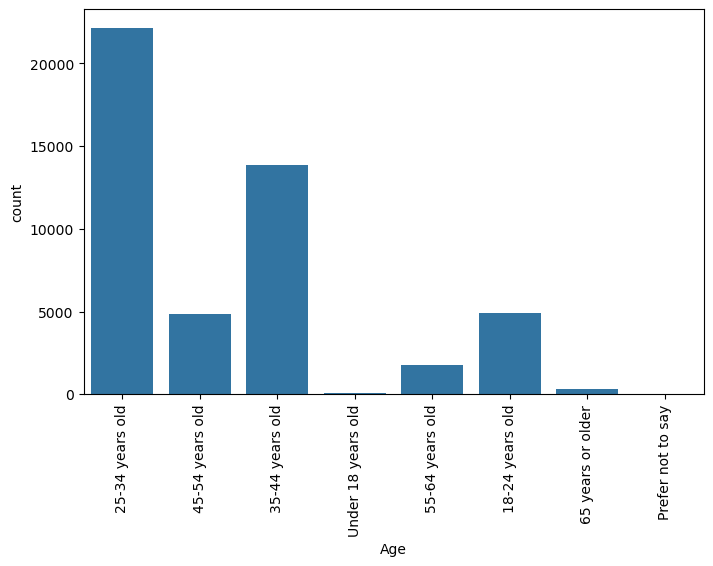

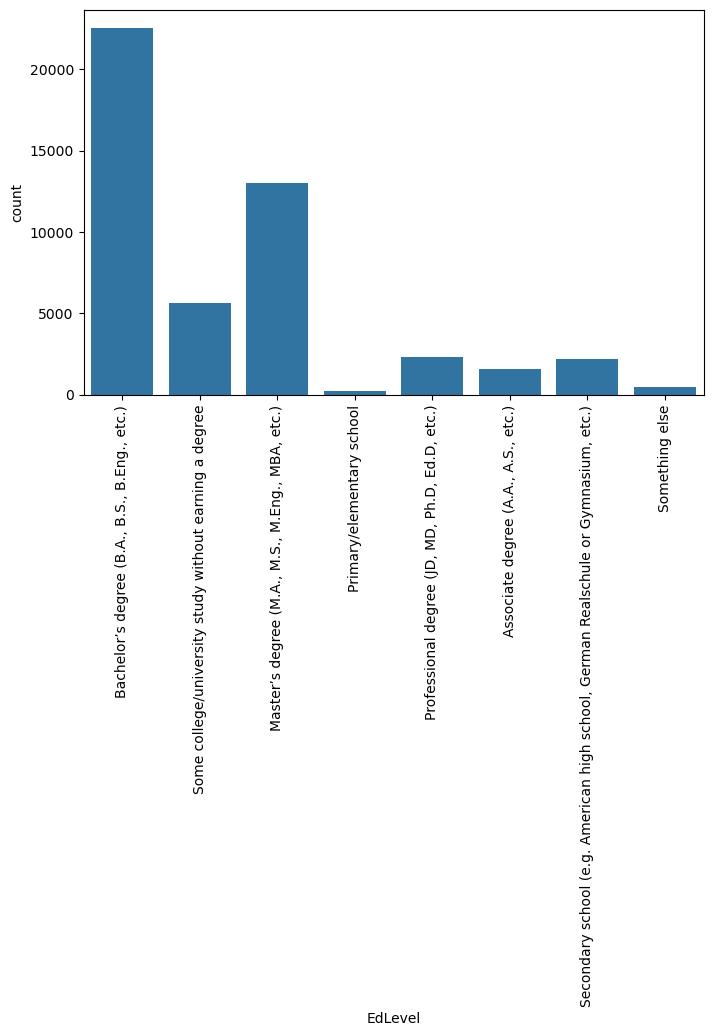

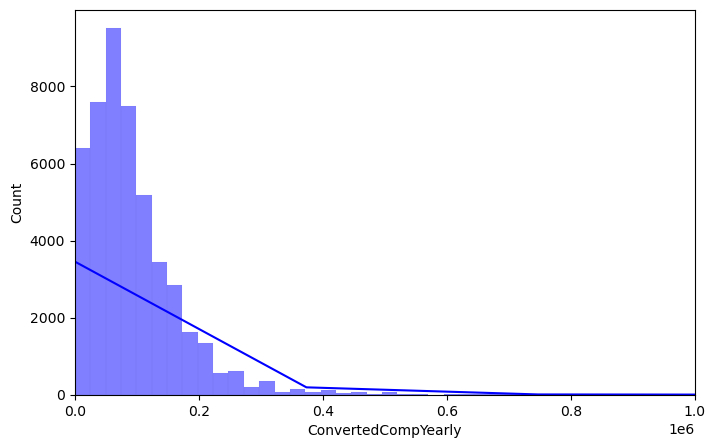

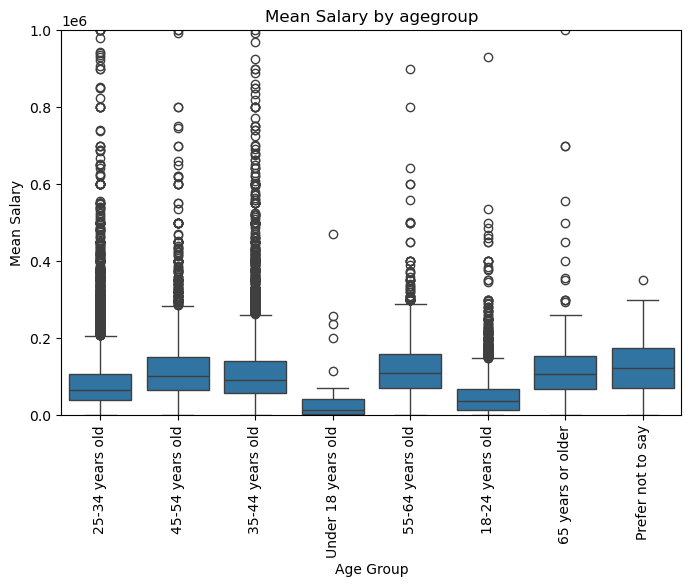

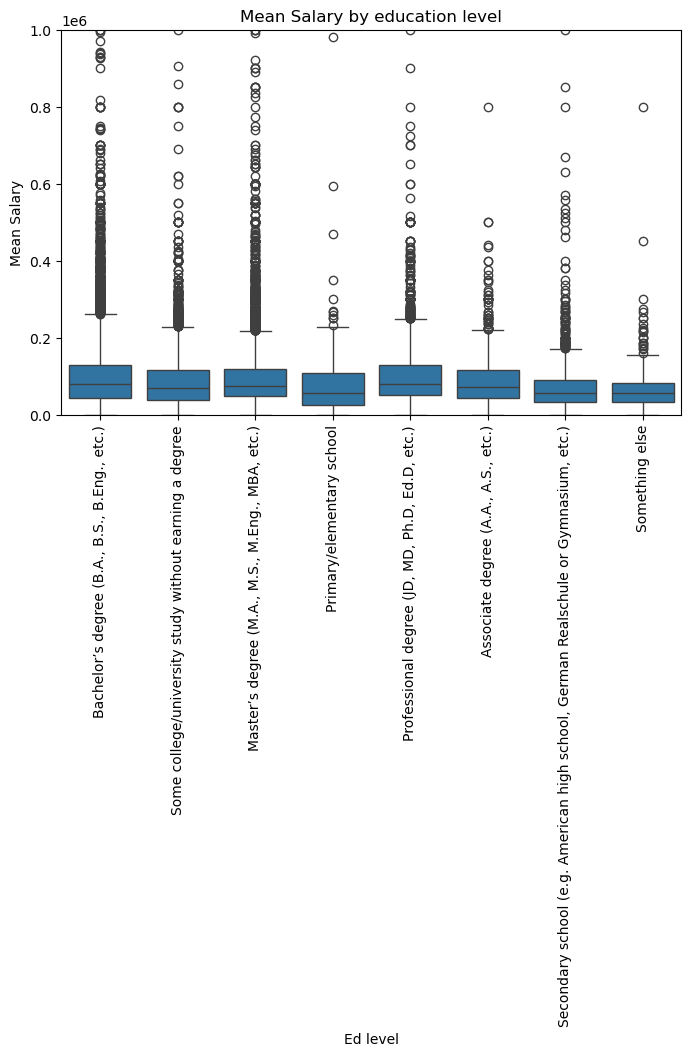

In [32]:
# Analyze data, how much are differrent ages and edlevels in there? and how is the group divided?
plot_count(df, "Age")
plot_count(df, "EdLevel")

# How is the salary divided in general?
plt.figure(figsize=(8, 5))
sns.histplot(df.ConvertedCompYearly, bins=3000, kde=True, color="blue") 
plt.xlim(0, 1000000)

# Plot mean salary by age group. Clearly some outliers in salary are present.
boxplot_Salary(df,'Age',"Age Group","Mean Salary","Mean Salary by agegroup")

# Plot mean salary by EdLevel group in a boxplot. Clearly some outliers in salary are present.
boxplot_Salary(df,'EdLevel',"Ed level","Mean Salary","Mean Salary by education level")



<span style="font-size:24px;"> Further cleaning/prepare of data for training after analysis

Remove outliers using the z-score (everything more than 3 sigma away from the mean is removed).
Furthremore data is splitted in X and y and test and train data set.

In [39]:
# Drop edlevel, to simplify the model
df = df[["Age", "ConvertedCompYearly" ]]

# remove outliers using the z-score
salaries = df[["ConvertedCompYearly"]]
z_scores = np.abs((salaries - salaries.mean()) / salaries.std())

# Set a threshold for outliers
threshold = 3
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

# change to numeric data which can be used and print types
df = pd.get_dummies(df)


<span style="font-size:24px;">Prepare training and test data set

Data is splitted in X and y and test and train data set.

In [40]:
# split data in inputs and outputs
y = df['ConvertedCompYearly']
X = df.drop('ConvertedCompYearly', axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=654)

<span style="font-size:24px;">Initialize and make model

Here a random forest (of 1 tree, so actually a random tree) is created and trained on the test data. Furthermore, the trained model is used to make predictions on the test and train data set.

In [34]:
# Make and train the randomforestregressor with n_estimators number of trees. (we use 1 tree, so not really a forest)
model = RandomForestClassifier(n_estimators = 1, max_depth = 25, random_state=654)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_predTrain = model.predict(X_train)


<span style="font-size:24px;"> Evaluate performance

First root mean squared error of the train and test data are computed. This shows that the model slightly overfits and is bad at predicting salaries.
Furthermore, a scatter plot is made of the predicted and actual salary, showing that  the prediction of salary based on the age group is very bad. Probably more features are needed for better predictions.



Root Mean Squared Error Test: 102430.08
Root Mean Squared Error Train: 93271.54


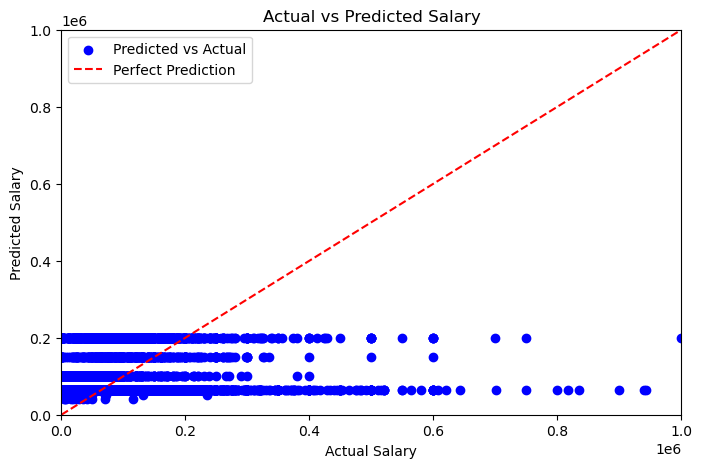

In [35]:
# Evaluate the models RMSE
rmse = root_mean_squared_error(y_test, y_pred)
rmseTrain = root_mean_squared_error(y_train, y_predTrain)
print(f"Root Mean Squared Error Test: {rmse:.2f}")
print(f"Root Mean Squared Error Train: {rmseTrain:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction")
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()


<span style="font-size:24px;"> Concluding notes </span>

Conclusion is that the model is very bad at predicting salary, it has a RMSE of 102.000 (suppose dollars), so that is a very bad predicting capability.
Likely part is due to the data, which seems quite bad with to few inputs to predict the output, it is hard to distinguish the salary based on age group alone.
Answer to the main question is that salary alone is a bad indicator of programmers salary.